In [129]:
import pandas as pd
import sklearn.linear_model
import sklearn.svm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_large():
    plt.figure(figsize=(8, 5), dpi=200)

sns.set()

In [3]:
lap_times = pd.read_csv('f1-data/lapTimes.csv')

In [4]:
driver_times = lap_times.groupby([lap_times.raceId, lap_times.driverId, lap_times.lap]).sum()

In [5]:
race_1_drivers = driver_times.loc[(1)].index.get_level_values(0).unique()

In [6]:
for driver in race_1_drivers:
    driver_times.loc[(1, driver)].milliseconds = np.cumsum(driver_times.loc[(1, driver)].milliseconds)

In [78]:
races = pd.read_csv('./f1-data/races.csv')
constructors = pd.read_csv('./f1-data/constructors.csv')
constructor_standings = pd.read_csv('./f1-data/constructorStandings.csv').drop(columns=['Unnamed: 7'])

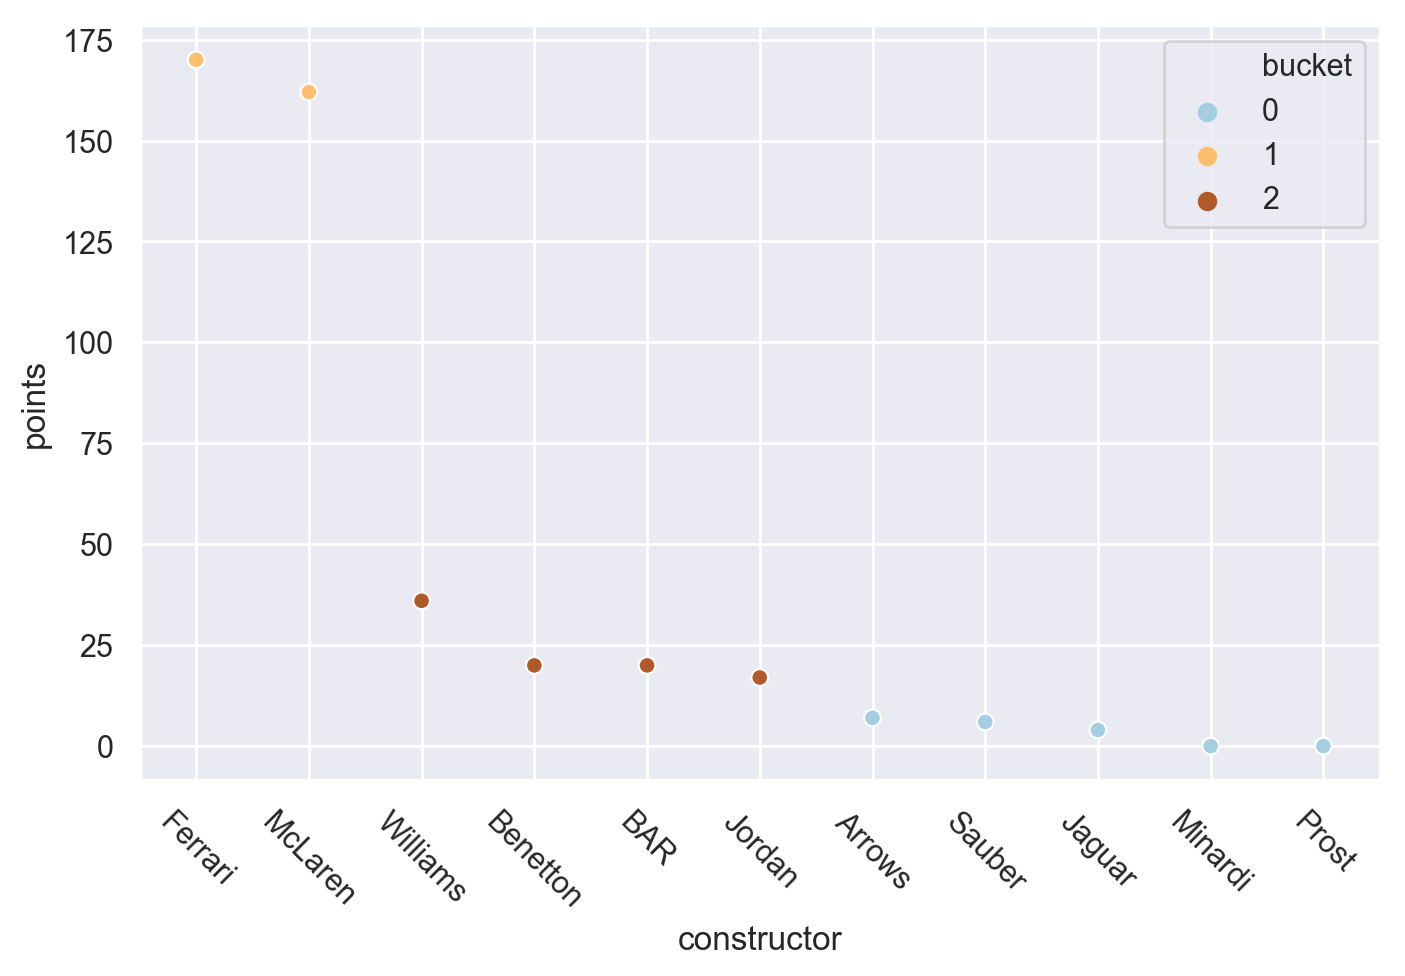

In [128]:
season = 2000

season_races = races[races['year'] == season]
features = constructor_standings[constructor_standings.raceId == season_races.raceId.max()]
features = features[['position', 'points', 'constructorId']]
features['constructor'] = [constructors[constructors.constructorId == x].name.values[0] for x in features['constructorId']]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(features[['position', 'points']])
features['bucket'] = kmeans.labels_
features = features.sort_values(by='position')

plot_large()
sns.scatterplot(x='constructor', y='points', hue='bucket', data=features, palette='Paired')
plt.xticks(rotation=-45);